In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_words = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_words)
print(len(x_train), "train sequences")
print(len(x_val), "validation sequences")
print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_val = sequence.pad_sequences(x_val, maxlen=max_len)
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 validation sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_val shape: (25000, 500)


In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Embedding(max_words, 64, input_length=max_len))
model.add(layers.Conv1D(16, 7, activation="relu"))
model.add(layers.Conv1D(16, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(16, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["acc"])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 16)           7184      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 488, 16)           1808      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 97, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 91, 16)            1808      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 16)            0         
_________________________________________________________________
flat

We get a maximum validation accuracy of 87%, but after this the validation accuracy falls while training accuracy reachs >99%! Clear overfitting.

In [3]:
import matplotlib.pyplot as plt

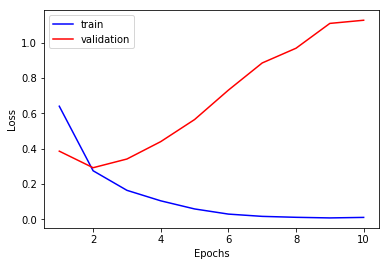

In [4]:
history_dict = history.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "b-", label="train")
plt.plot(epochs, val_loss, "r-", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("IMDB_loss.pdf")
plt.show()

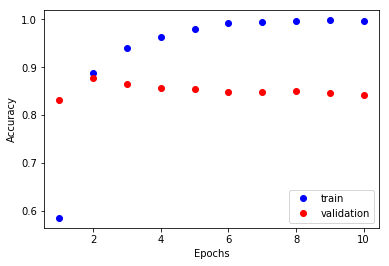

In [5]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, train_acc, "bo", label="train")
plt.plot(epochs, val_acc, "ro", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("IMDB_accuracy.pdf")
plt.show()